Ahmad Bilal & Dara Varam STA401 Crash Course Code

Batman VS Superman (Classification Problem)

In [ ]:
import keras
from keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image

In [ ]:
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 6} ) 
sess = tf.compat.v1.Session(config=config) 
keras.backend.set_session(sess)

In [ ]:
from keras import backend as K

def F1_Score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
def load_data():
    x = []
    y = [] # 0 for Batman and 1 for Superman
    bat = os.listdir("data_q1/Batman")
    sup = os.listdir("data_q1/Superman")
    for pic in bat:
        temp = cv2.imread("data_q1/Batman/"+pic)
        temp.astype('float32')
        temp=cv2.resize(temp,(128,128))
        x.append(temp)
        y.append(0)
    for pic in sup:
        temp = cv2.imread("data_q1/Superman/"+pic)
        temp.astype('float32')
        temp=cv2.resize(temp,(128,128))
        x.append(temp)
        y.append(1)
    return np.array(x),np.array(y)

In [ ]:
x,y = load_data()

In [ ]:
print(x.shape)
y=y.reshape(19,1)
print(y.shape)

(19, 128, 128, 3)
(19, 1)


In [ ]:
totalDatasetSize = 5000

In [ ]:
indices = np.random.choice(list(range(len(x))), size=totalDatasetSize, replace=True)
x_all=x[indices]
y_all=y[indices]

In [ ]:
x_all.shape

(5000, 128, 128, 3)

In [ ]:
trainInd = np.random.choice(list(range(len(x_all))), size=int(0.6*totalDatasetSize), replace=True)
testInd = np.random.choice(list(range(len(x_all))), size=int(0.2*totalDatasetSize), replace=True)
validInd = np.random.choice(list(range(len(x_all))), size=int(0.2*totalDatasetSize), replace=True)
xtrain = x_all[trainInd]
ytrain = y_all[trainInd]
xtest = x_all[testInd]
ytest = y_all[testInd]
xvalid = x_all[validInd]
yvalid = y_all[validInd]
print(xtrain.shape)
print(xtest.shape)
print(xvalid.shape)

(3000, 128, 128, 3)
(1000, 128, 128, 3)
(1000, 128, 128, 3)


In [ ]:
from keras.layers import Conv2D, Dropout,Dense,MaxPool2D, Flatten,BatchNormalization,Input
from keras.models import Model, Sequential

In [ ]:
def makeModel():
    model = Sequential()
    model.add(Conv2D(32,(4,4),padding='same',activation='relu',input_shape=(128,128,3)))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(128,(2,2),padding='same',activation='relu'))
    model.add(MaxPool2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    
    return model

Note:
The architecture chosen is a Convolutional Neural Network using 2D convolutions. This is most suitable since the problem is an image classification problem in computer vision.

It has 3 convolutional layers, followed by Max Pooling layers, this helps extract features from the images before passing them into a dense layer that does the classification.

Successive convolutional layers have increasing number of fitlers and decreasing number of kernel_sizes, which is a common practice. Moreover, the padding is same to not change the size of the image.

The Max Pool layers help reduce the dimensions of the feature maps extracted by the convolutional layer and helps prevent exploding gradients.

The last two layers are simple dense layers, the 2nd last has a relu activation, and the last has a sigmoid activation because we are predicting between two classes, 0 or 1.

In [ ]:
model = makeModel()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      1568      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)            

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',F1_Score])

In [ ]:
history = model.fit(xtrain,ytrain,epochs=30,batch_size=32,validation_data=(xvalid, yvalid),verbose=1)

Epoch 1/30
94/94 [==============================] - 3s 27ms/step - loss: 24.6029 - accuracy: 0.9430 - F1_Score: 0.9230 - val_loss: 2.0558e-10 - val_accuracy: 1.0000 - val_F1_Score: 1.0000
Epoch 2/30
94/94 [==============================] - 2s 24ms/step - loss: 4.2050e-09 - accuracy: 1.0000 - F1_Score: 1.0000 - val_loss: 1.6998e-10 - val_accuracy: 1.0000 - val_F1_Score: 1.0000
Epoch 3/30
94/94 [==============================] - 2s 25ms/step - loss: 2.3928e-09 - accuracy: 1.0000 - F1_Score: 1.0000 - val_loss: 1.5644e-10 - val_accuracy: 1.0000 - val_F1_Score: 1.0000
Epoch 4/30
94/94 [==============================] - 2s 25ms/step - loss: 2.4125e-09 - accuracy: 1.0000 - F1_Score: 1.0000 - val_loss: 1.3582e-10 - val_accuracy: 1.0000 - val_F1_Score: 1.0000
Epoch 5/30
94/94 [==============================] - 2s 25ms/step - loss: 6.5017e-09 - accuracy: 1.0000 - F1_Score: 1.0000 - val_loss: 9.4414e-11 - val_accuracy: 1.0000 - val_F1_Score: 1.0000
Epoch 6/30
94/94 [==============================

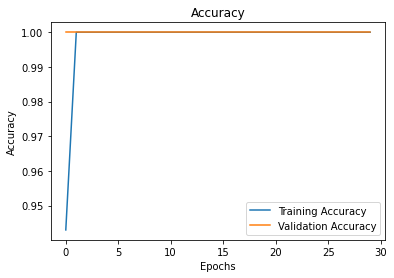

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Accuracy")
plt.show()

Clearly the model is performing great since both training and validation accuracy reach 100% after the first few epochs. This indicates no overfitting since both lines follow eachother, and stablize together.

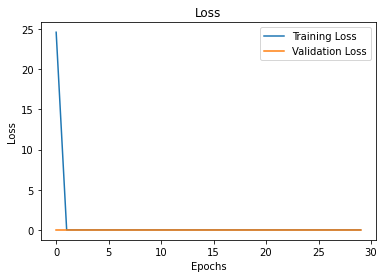

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.title("Loss")
plt.show()

Clearly the model is performing great since both training and validation loss reach 0 after the first few epochs. This indicates no overfitting since both lines follow eachother, and stablize together at 0.

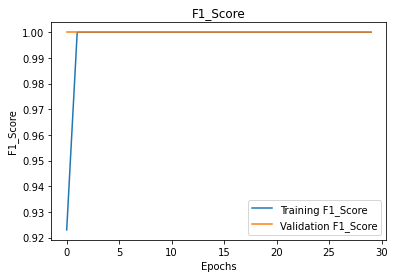

In [ ]:
plt.plot(history.history['F1_Score'])
plt.plot(history.history['val_F1_Score'])
plt.xlabel("Epochs")
plt.ylabel("F1_Score")
plt.legend(['Training F1_Score','Validation F1_Score'])
plt.title("F1_Score")
plt.show()

Clearly the model is performing great since both training and validation F1 Score reach 1 after the first few epochs. This indicates no overfitting since both lines follow eachother, and stablize together. This indicates that the model is perfect and is able to classify Batman and Superman perfectly

In [ ]:
score = model.evaluate(xtest, ytest)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test F1: ',score[2])

32/32 [==============================] - 0s 6ms/step - loss: 3.7717e-12 - accuracy: 1.0000 - F1_Score: 1.0000
Test loss: 3.7717411659199396e-12
Test accuracy: 1.0
Test F1:  1.0


In [ ]:
preds=model.predict(xtest)

In [ ]:
preds.shape

(1000, 1)

In [ ]:
preds=np.round(preds)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print("Classfication report:")
print(classification_report(ytest,preds[:,0]))

Classfication report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       519
           1       1.00      1.00      1.00       481

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



Clearly, the classification report shows a perfect recall, precision and F1 Score for both classes indicating perfect model.

In [ ]:
print("Confusion matrix:")
print(confusion_matrix(ytest,preds[:,0]))

Confusion matrix:
[[519   0]
 [  0 481]]


Since all the values are on the main diagonal, the model predicted every class correctly!

In [ ]:
def generate_actual_predicted(model,x,y):
    ypred=model.predict(x)
    preds=np.round(ypred)
    reals=y[:,0]
    
    return reals,preds

In [ ]:
# This will only use the training data 
# and test it on each partition
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


import tensorflow as tf
n_split=10
 
# We will split the the data n_split times
# and create and for the model with the said
# parameters

results = list()
for train_index,test_index in KFold(n_split).split(xtrain): 
  # use the index to generate training an testing sets
  x_train,x_test=xtrain[train_index],xtrain[test_index]
  y_train,y_test=ytrain[train_index],ytrain[test_index]
  
  # create and fit the model
  model=makeModel()
  model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',F1_Score])
  model.fit(x_train, y_train,epochs=5)
  
  # print and show generic metrics available
  scores = model.evaluate(x_test,y_test)
 
  # print the model metrics
  for i,names in zip(np.arange(0,len(model.metrics_names)),model.metrics_names):
      print(model.metrics_names[i],'=',scores[i])
  # calculate and print more metrics
  actual, predicted = generate_actual_predicted(model, x_test, y_test)
  print("precision ",precision_score(actual, predicted, average='macro'))
  print("recall ", recall_score(actual, predicted, average='macro'))
  print("F1-Score ", f1_score(actual, predicted, average='macro'))
  results.append([precision_score(actual, predicted, average='macro'),
                  recall_score(actual, predicted, average='macro'), 
                  f1_score(actual, predicted, average='macro') ])

Epoch 1/5
85/85 [==============================] - 3s 23ms/step - loss: 13.1892 - accuracy: 0.9674 - F1_Score: 0.9606
Epoch 2/5
85/85 [==============================] - 2s 22ms/step - loss: 5.5613e-20 - accuracy: 1.0000 - F1_Score: 1.0000
Epoch 3/5
85/85 [==============================] - 2s 22ms/step - loss: 6.4154e-20 - accuracy: 1.0000 - F1_Score: 1.0000
Epoch 4/5
85/85 [==============================] - 2s 23ms/step - loss: 3.4791e-25 - accuracy: 1.0000 - F1_Score: 1.0000
Epoch 5/5
10/10 [==============================] - 0s 7ms/step - loss: 8.2060e-34 - accuracy: 1.0000 - F1_Score: 1.0000
loss = 8.206026880754538e-34
accuracy = 1.0
F1_Score = 1.0
precision  1.0
recall  1.0
F1-Score  1.0
Epoch 1/5
85/85 [==============================] - 3s 22ms/step - loss: 17.7538 - accuracy: 0.9530 - F1_Score: 0.9385
Epoch 2/5
85/85 [==============================] - 2s 22ms/step - loss: 2.7157e-11 - accuracy: 1.0000 - F1_Score: 1.0000
Epoch 3/5
85/85 [==============================] - 2s 22ms/s

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


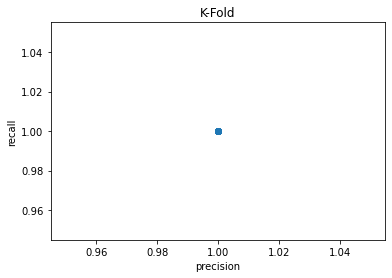

min precision: 1.0
min recall: 1.0
max precision: 1.0
max recall: 1.0
average precision: 1.0 sd= 0.0
average recall: 1.0 sd= 0.0


In [ ]:
# Plot the curves for precision
res = np.array(results)
#print(res)

prec = res[:,0]
print(prec)
recl = res[:,1]
print(recl)

import matplotlib.pyplot as plt
plt.scatter(prec, recl)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('K-Fold') 
plt.show()

print('min precision:', prec.min())
print('min recall:', recl.min())
print('max precision:', prec.max())
print('max recall:', recl.max())
print('average precision:', prec.mean(), 'sd=', prec.std())
print('average recall:', recl.mean(),'sd=', recl.std())

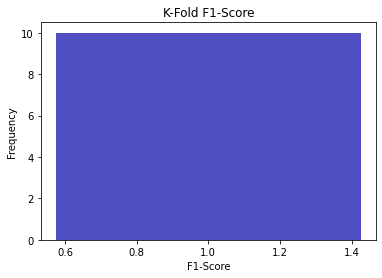

F1-Score: 1.0 sd= 0.0


In [ ]:
# show f1-score for k-fold
res = np.array(results)
f1_score = res[:,2]
plt.hist(x=f1_score, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.title('K-Fold F1-Score') 
plt.ylabel('Frequency') 
plt.xlabel('F1-Score') 
plt.show()
print('F1-Score:', f1_score.mean(), 'sd=', f1_score.std())

res_model1 = res


Clearly, the F1 score, recall and precision are all 1 for all the 10 Folds of validation, indicating a perfect model. We already established that there is no overfitting, and the Recall-Precision curve shows the perfection of the model

----------------------